# Проект "Бурёнки"

### Описание проекта 
Фермер, владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. Основной запрос в том, чтобы разработать прогнозные модели по удою и вкусу молока. 


**Основные задачи:**
- Провести предобработку данных
- Првоести исследовательский анализ данных
- Подготовить данные для модели
- Создать модель машинного обучения для поставленных целей
- Оптимизировать её

**data_main:**
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**dad**:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

**data_cow**
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm
import seaborn as sns

In [2]:
try:
    data_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
except:
    data_main = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/ferma_main.csv', sep = ';')

In [3]:
data_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
try:
    dad =  pd.read_csv('/datasets/ferma_dad.csv', sep= ';')
except:
    dad = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/ferma_dad.csv', sep= ';')

In [6]:
dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
try:
    data_cow = pd.read_csv('/datasets/cow_buy.csv', sep= ';')
except:
    data_cow = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/cow_buy.csv', sep= ';')

In [8]:
data_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [9]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


**data_main**
- Данные в некоторых солбцах имеют некорректный тип данных по причине использования символа ",", а не ".". 
- На основании даных из этой таблицы можно будет найти взаимосвязь между особенностями корма и целевых показателей из основной задачи
- Графа "Возраст" не содержит числовой показатель

**data_cow**
- Анологичная проблема с символом ",", что и у основного датафрейма. 
- Этот датасет является тем, для которого нам надо построить модель машинного обучения

Этапы:
- Предобработка данных
- Исследовательский анализ данных
- Корреляционный анализ данных
- Модель регрессии
- Модель классификации
- Выводы

# Предобработка данных

In [10]:
data_name_df = [data_main, dad, data_cow]

**Задачи**
- Проверить датафреймы на корректность типов данных
- Проверить датафреймы на наличие дупликатов
- Проверить датафреймы на наличие пропусков
- Проверить датафреймы на наличие аномальных значений

In [11]:
def first_rem(name):
    name.columns = name.columns.str.lower()
    name.columns = name.columns.str.replace(' ', '_')
    print(name.isna().sum().sort_values(ascending = False))

In [12]:
for n in data_name_df:
    first_rem(n)
    


id                                       0
удой,_кг                                 0
эке_(энергетическая_кормовая_единица)    0
сырой_протеин,_г                         0
спо_(сахаро-протеиновое_соотношение)     0
порода                                   0
тип_пастбища                             0
порода_папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус_молока                              0
возраст                                  0
dtype: int64
id          0
имя_папы    0
dtype: int64
порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64


Все колонки привеены к нижнему регистру. Пропусков в данных не обнаружены

In [13]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   удой,_кг                               634 non-null    int64 
 2   эке_(энергетическая_кормовая_единица)  634 non-null    object
 3   сырой_протеин,_г                       634 non-null    int64 
 4   спо_(сахаро-протеиновое_соотношение)   634 non-null    object
 5   порода                                 634 non-null    object
 6   тип_пастбища                           634 non-null    object
 7   порода_папы_быка                       634 non-null    object
 8   жирность,%                             634 non-null    object
 9   белок,%                                634 non-null    object
 10  вкус_молока                            634 non-null    object
 11  возраст            

In [14]:
name_debug = ['спо_(сахаро-протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)', 'жирность,%', 'белок,%']

In [15]:
def data_type_rem(name):
    data_main[f'{name}'] = pd.to_numeric(data_main[f'{name}'].str.replace(',', '.'))

In [16]:
for m in name_debug:
    data_type_rem(m)
#data_type_rem('эке_(энергетическая_кормовая_единица)')
#data_type_rem('спо_(сахаро-протеиновое_соотношение)')

In [17]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой,_кг                               634 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  634 non-null    float64
 3   сырой_протеин,_г                       634 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип_пастбища                           634 non-null    object 
 7   порода_папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус_молока                            634 non-null    object 
 11  возрас

In [18]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [19]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип_пастбища             20 non-null     object
 2   порода_папы_быка         20 non-null     object
 3   имя_папы                 20 non-null     object
 4   текущая_жирность,%       20 non-null     object
 5   текущий_уровень_белок,%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [20]:
def data_type_rem(name):
    data_cow[f'{name}'] = pd.to_numeric(data_cow[f'{name}'].str.replace(',', '.'))

In [21]:
for m in ['текущая_жирность,%', 'текущий_уровень_белок,%']:
    data_type_rem(m)

In [22]:
data_cow.info()
data_cow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Данные заменены с object на float в столбцах: эке, спо, жирность и белок в датафрейме data_main, а также в столбцах текущая жирность и текущий белок в датафрейме data_cow

In [23]:
for q in data_name_df:
   print(q.shape)
   print(q.duplicated().sum())

(634, 12)
5
(629, 2)
0
(20, 7)
4


In [24]:
data_main = data_main.drop_duplicates()
print(data_main.duplicated().sum())
data_cow = data_cow.drop_duplicates()
print(data_cow.duplicated().sum())

0
0


In [25]:
data_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [26]:
data_main['порода_папы_быка'].unique()


array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [27]:
data_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [28]:
data_cow['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [29]:
data_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [30]:
data_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [31]:
data_cow['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [32]:
data_cow['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [33]:
data_cow['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [34]:
data_main['тип_пастбища'] = data_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
data_main['порода_папы_быка'] = data_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
data_main['порода'] = data_main['порода'].replace('Вис Бик Айдиал', 'Вис_Бик_Айдиал')
data_cow['порода'] = data_cow['порода'].replace('Вис Бик Айдиал', 'Вис_Бик_Айдиал')
data_main['порода'] = data_main['порода'].replace('РефлешнСоверинг', 'Рефлешн_Соверинг')
data_cow['порода'] = data_cow['порода'].replace('РефлешнСоверинг', 'Рефлешн_Соверинг')

C:\Users\simuk\AppData\Local\Temp/ipykernel_8532/2644058080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main['тип_пастбища'] = data_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
C:\Users\simuk\AppData\Local\Temp/ipykernel_8532/2644058080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main['порода_папы_быка'] = data_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
C:\Users\simuk\AppData\Local\Temp/ipykernel_8532/2644058080.py:3: SettingWithCopyWarning: 
A value is trying 

In [35]:
print(data_main['тип_пастбища'].unique())
print(data_main['порода_папы_быка'].unique())
print(data_cow['порода_папы_быка'].unique())
print(data_main['порода'].unique())
print(data_cow['порода'].unique())

['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']
['Айдиал' 'Соверин']
['Вис_Бик_Айдиал' 'Рефлешн_Соверинг']
['Вис_Бик_Айдиал' 'Рефлешн_Соверинг']


- Удалены явные дубликаты. Они могли возникнуть из-за ошибки урчного заполнения. 
- Удалены неявные дубликаты. Они могли возникнуть по технической причине. 

In [36]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой,_кг                               629 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  629 non-null    float64
 3   сырой_протеин,_г                       629 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   629 non-null    float64
 5   порода                                 629 non-null    object 
 6   тип_пастбища                           629 non-null    object 
 7   порода_папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус_молока                            629 non-null    object 
 11  возрас

In [37]:
def barplot_function(name):
    try:
        plt.figure(figsize=(15, 15))
        data_main[f'{name}'].plot.box()
        plt.title(f'{name}')
        plt.show()
    except:
        pass
    print(data_main[f'{name}'].describe())

In [38]:
def barplot_function_1(name):
    try:
        plt.figure(figsize=(15, 15))
        data_cow[f'{name}'].plot.box()
        plt.title(f'{name}')
        plt.show()
    except:
        pass
    print(data_cow[f'{name}'].describe())

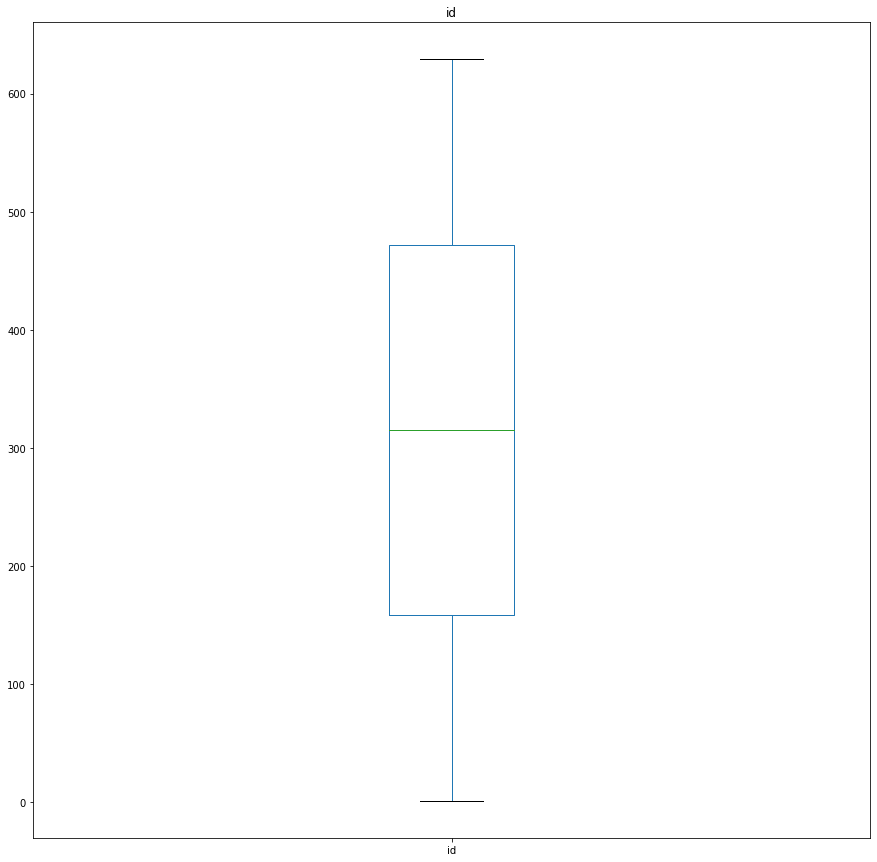

count    629.00000
mean     315.00000
std      181.72094
min        1.00000
25%      158.00000
50%      315.00000
75%      472.00000
max      629.00000
Name: id, dtype: float64


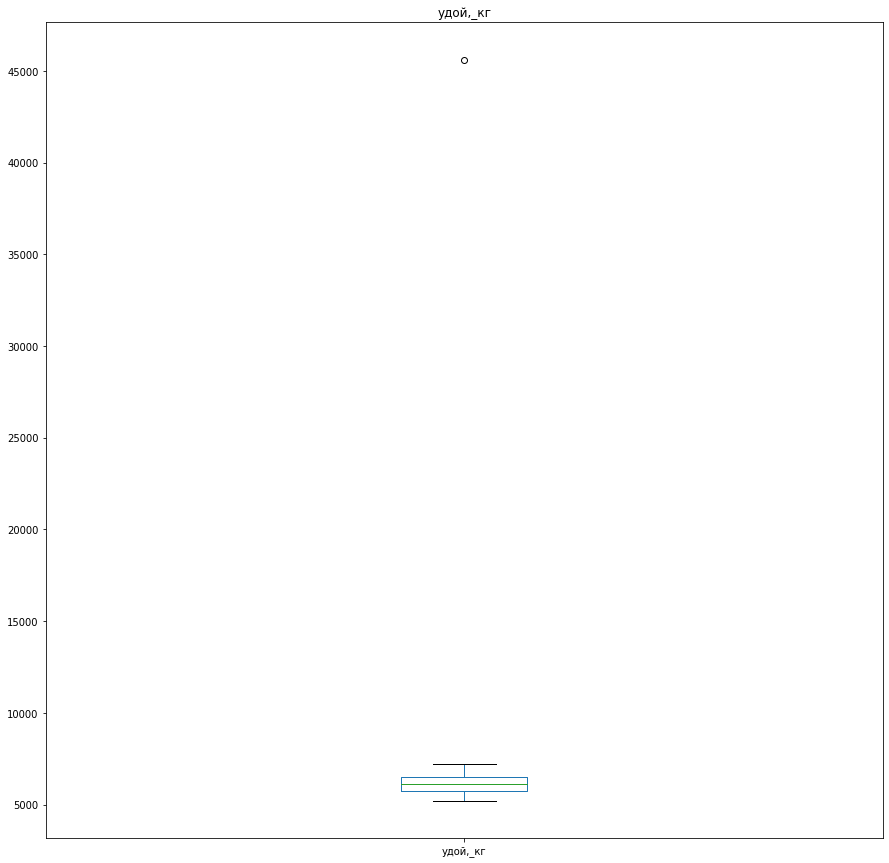

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой,_кг, dtype: float64


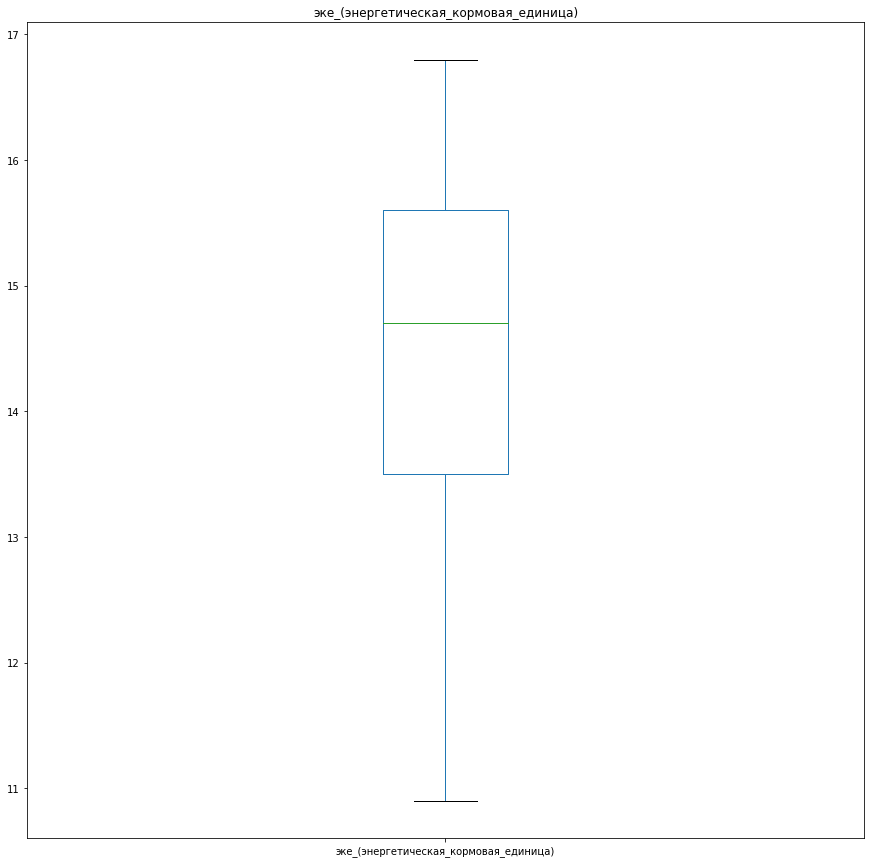

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке_(энергетическая_кормовая_единица), dtype: float64


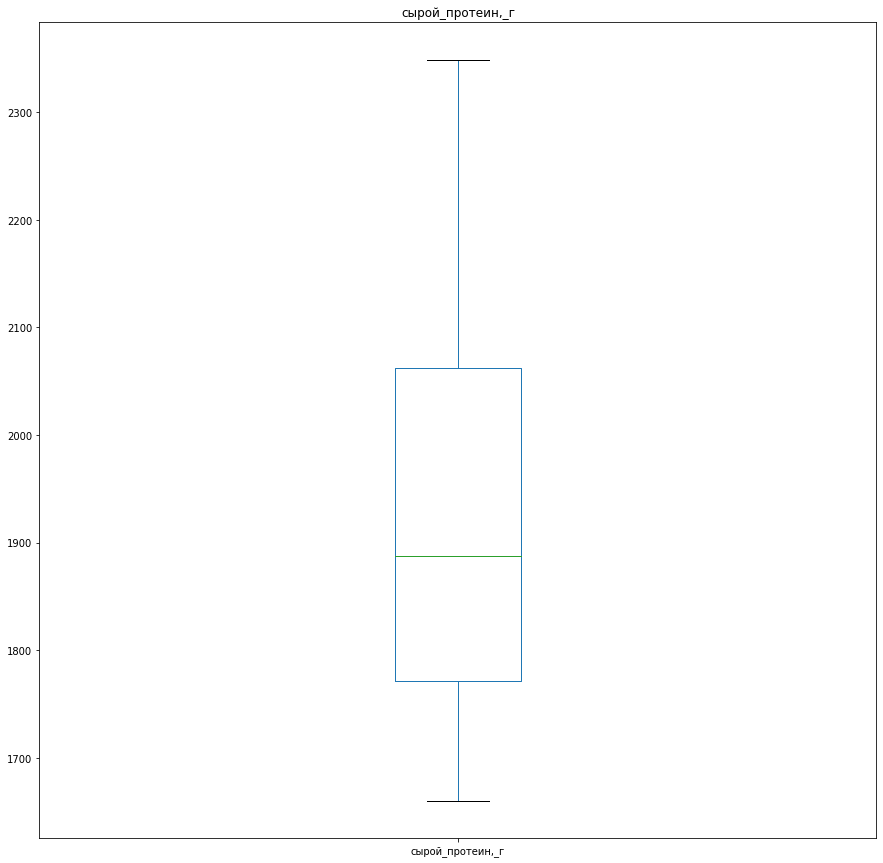

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой_протеин,_г, dtype: float64


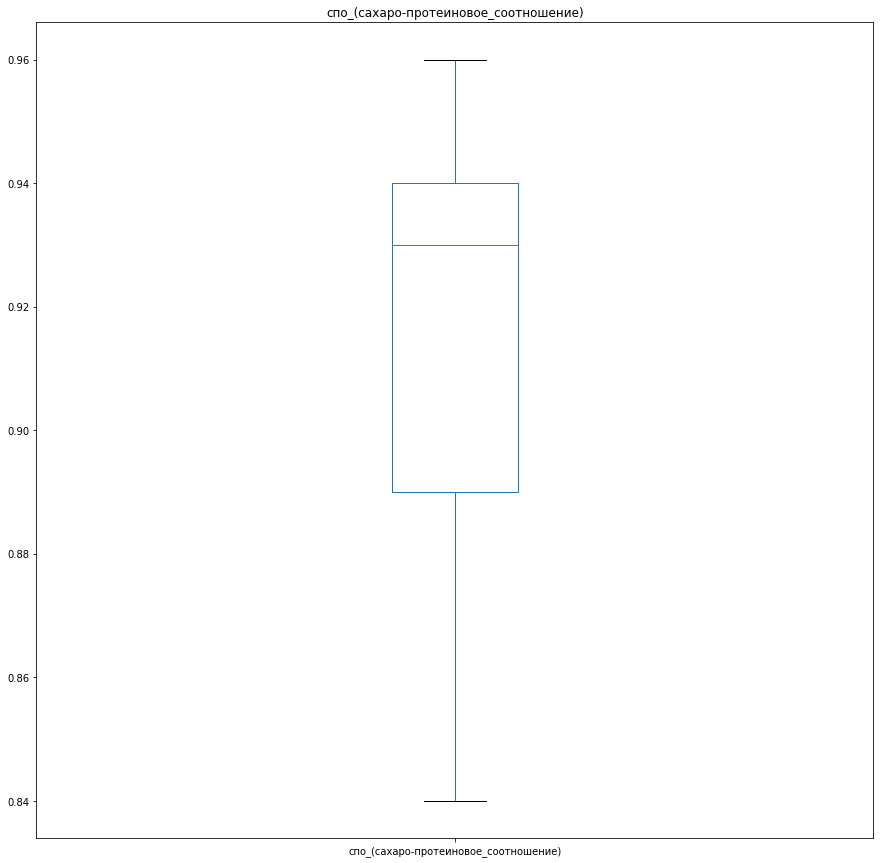

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо_(сахаро-протеиновое_соотношение), dtype: float64
count                629
unique                 2
top       Вис_Бик_Айдиал
freq                 373
Name: порода, dtype: object
count           629
unique            2
top       Холмистое
freq            351
Name: тип_пастбища, dtype: object
count        629
unique         2
top       Айдиал
freq         318
Name: порода_папы_быка, dtype: object


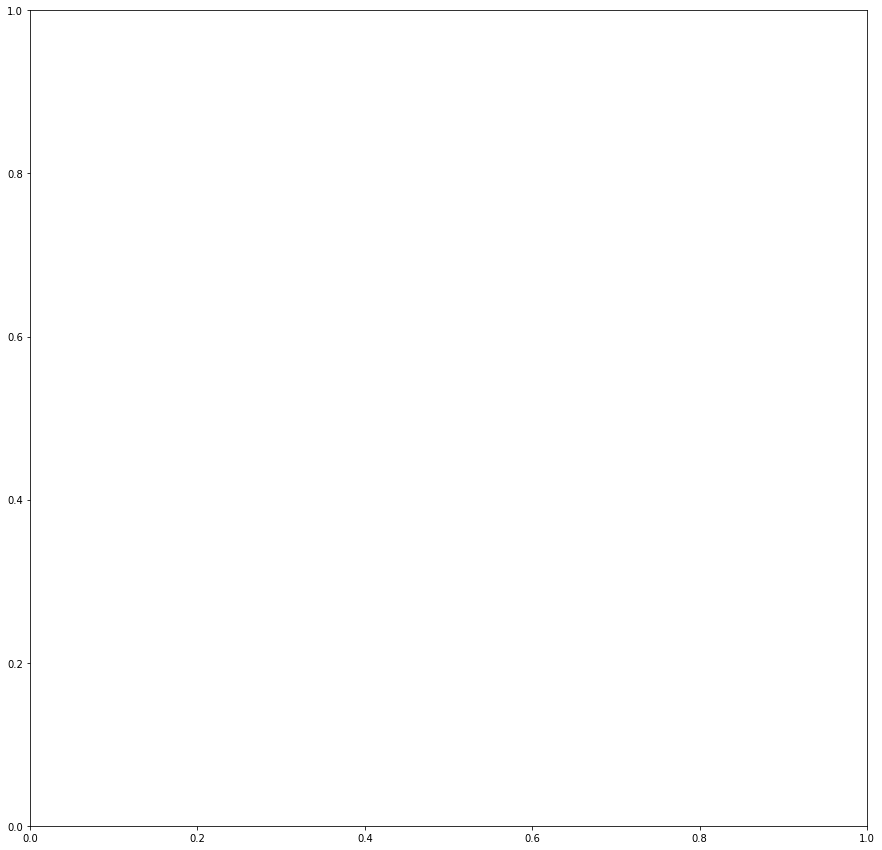

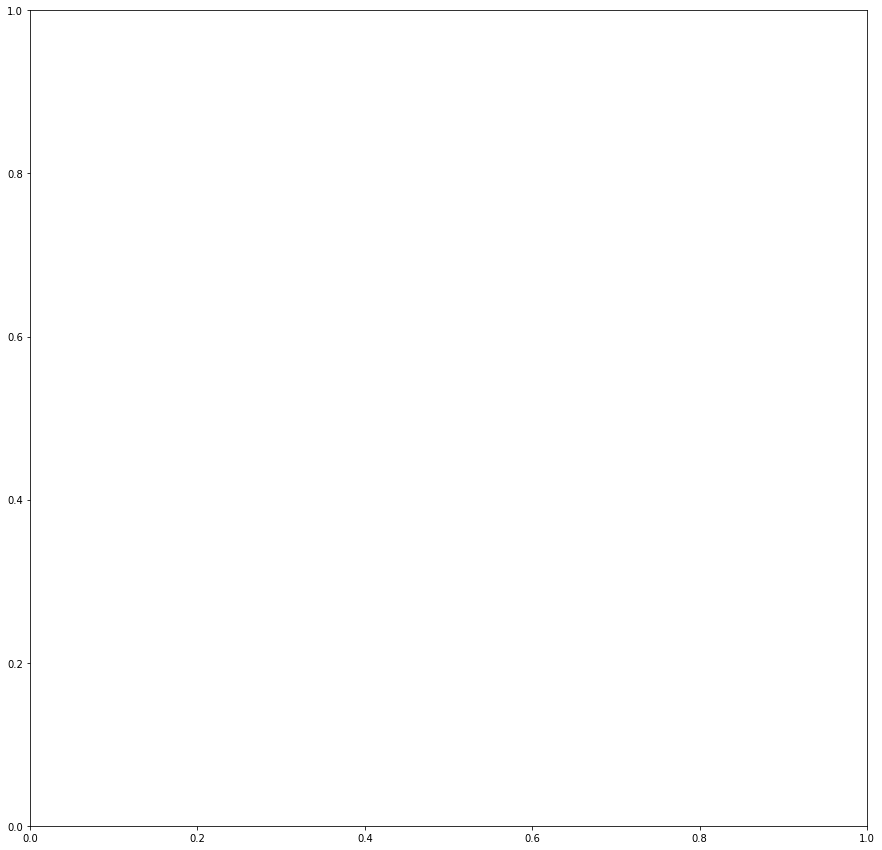

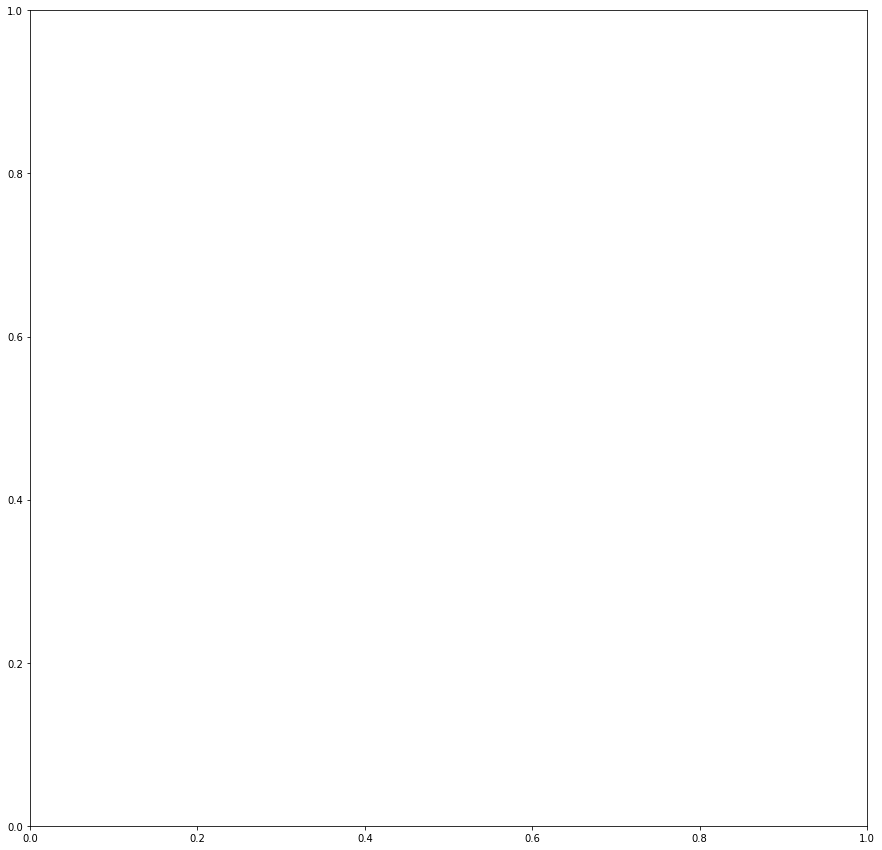

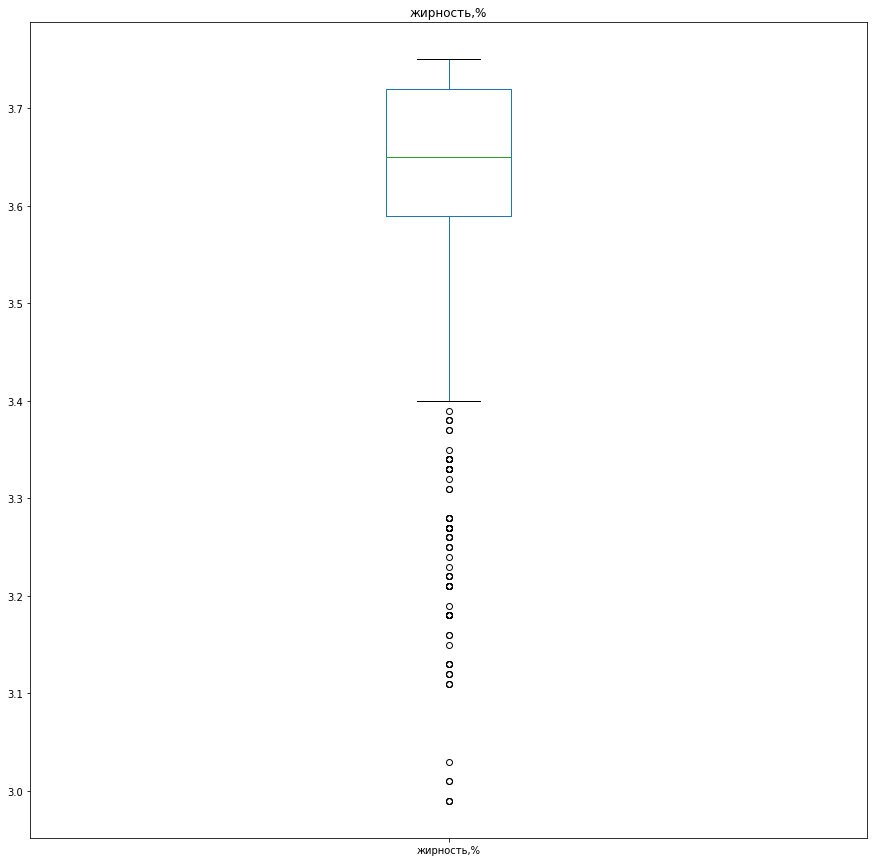

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64


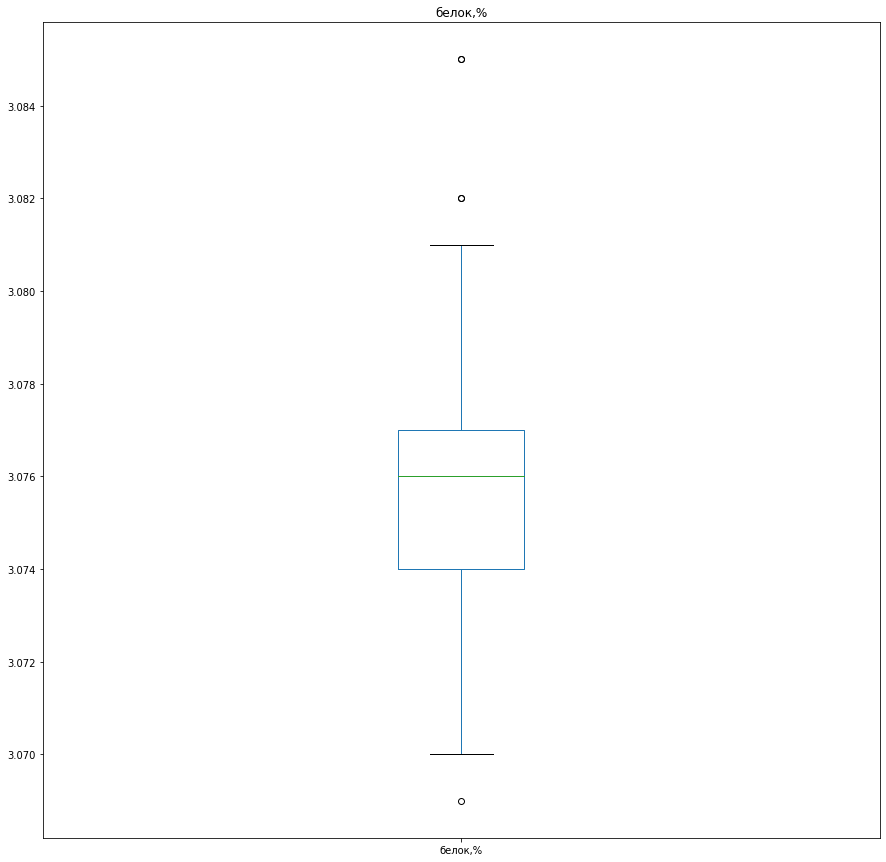

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64
count        629
unique         2
top       вкусно
freq         371
Name: вкус_молока, dtype: object
count             629
unique              2
top       более_2_лет
freq              519
Name: возраст, dtype: object


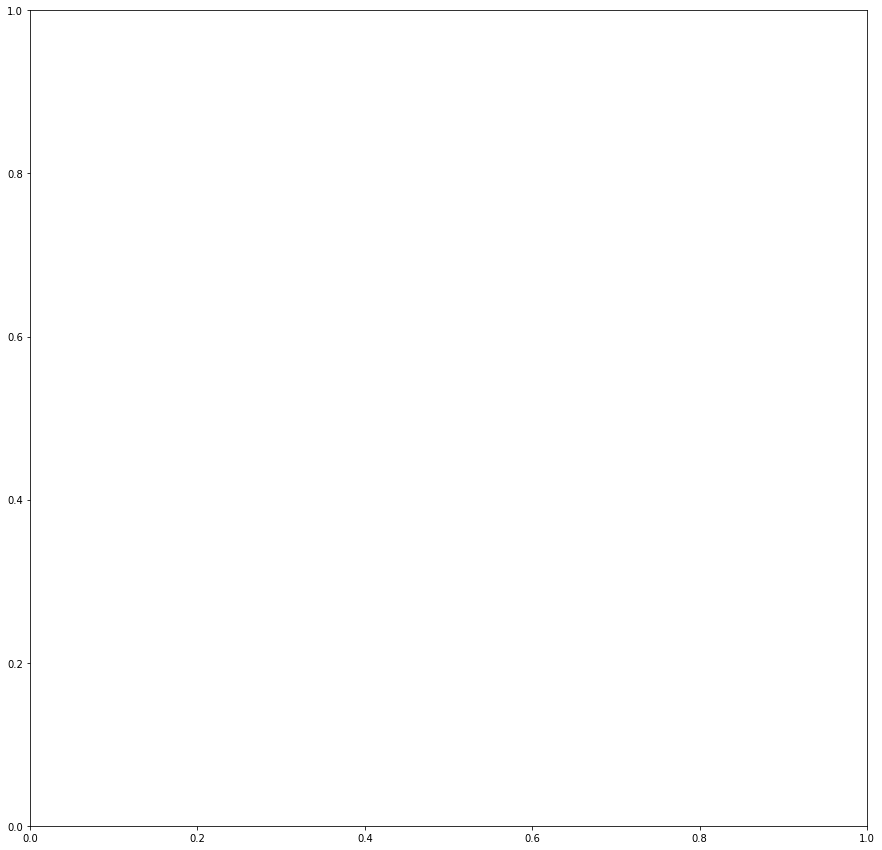

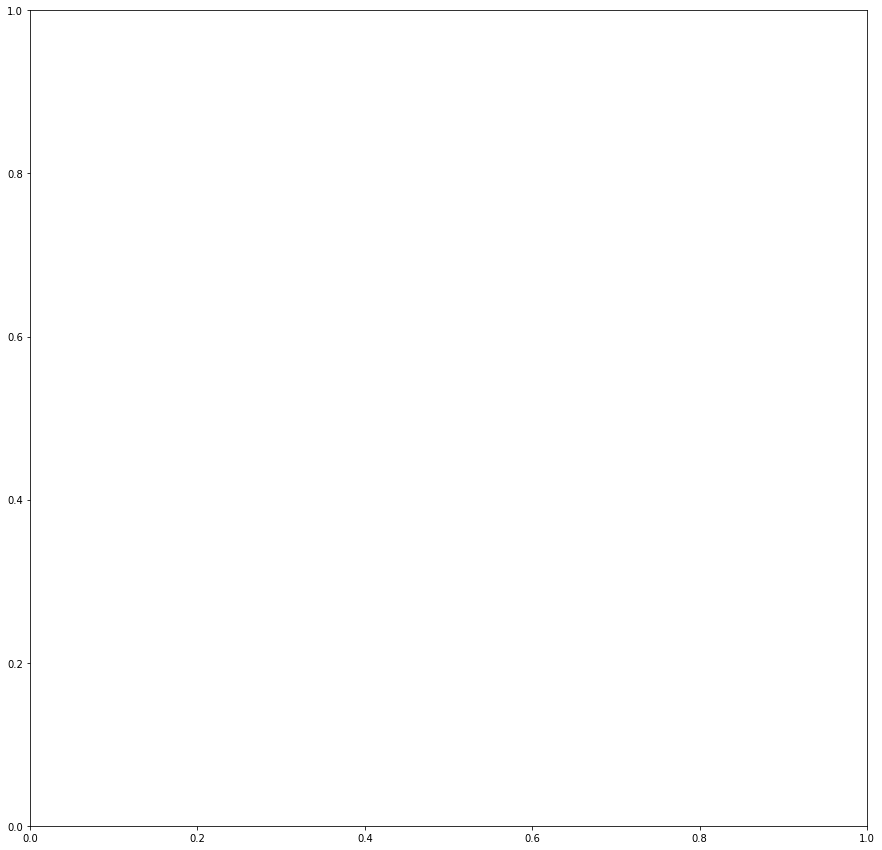

In [39]:
for n in data_main.columns:
    barplot_function(n)

count                 16
unique                 2
top       Вис_Бик_Айдиал
freq                   8
Name: порода, dtype: object
count            16
unique            2
top       равнинное
freq              8
Name: тип_пастбища, dtype: object
count          16
unique          2
top       Соверин
freq           10
Name: порода_папы_быка, dtype: object
count         16
unique         4
top       Буйный
freq           7
Name: имя_папы, dtype: object


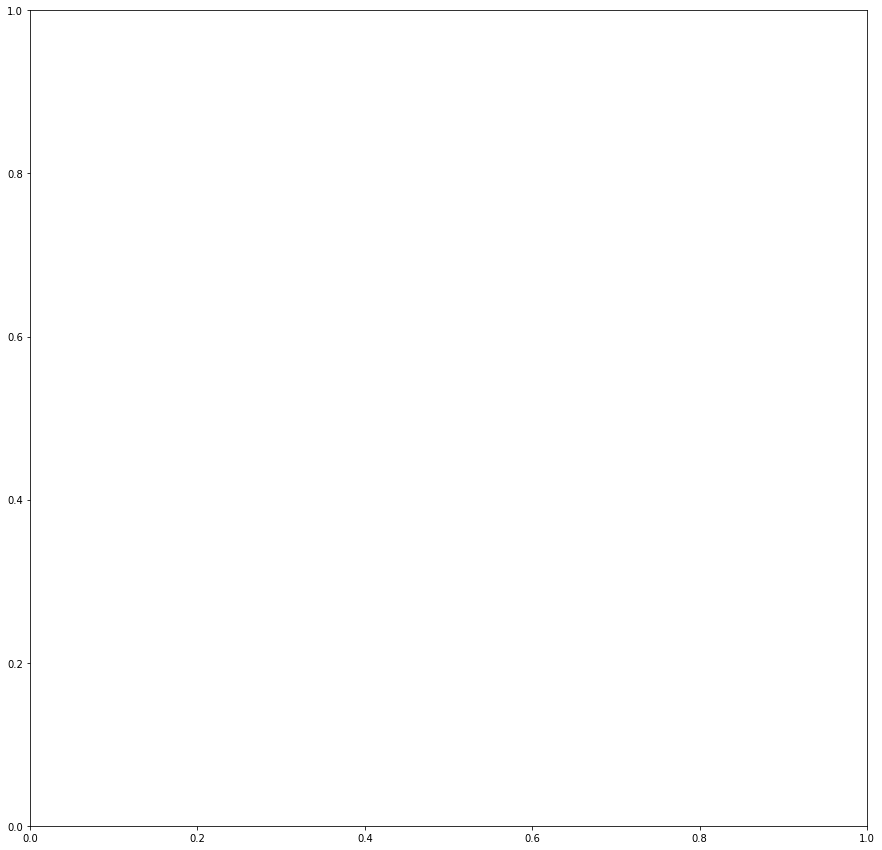

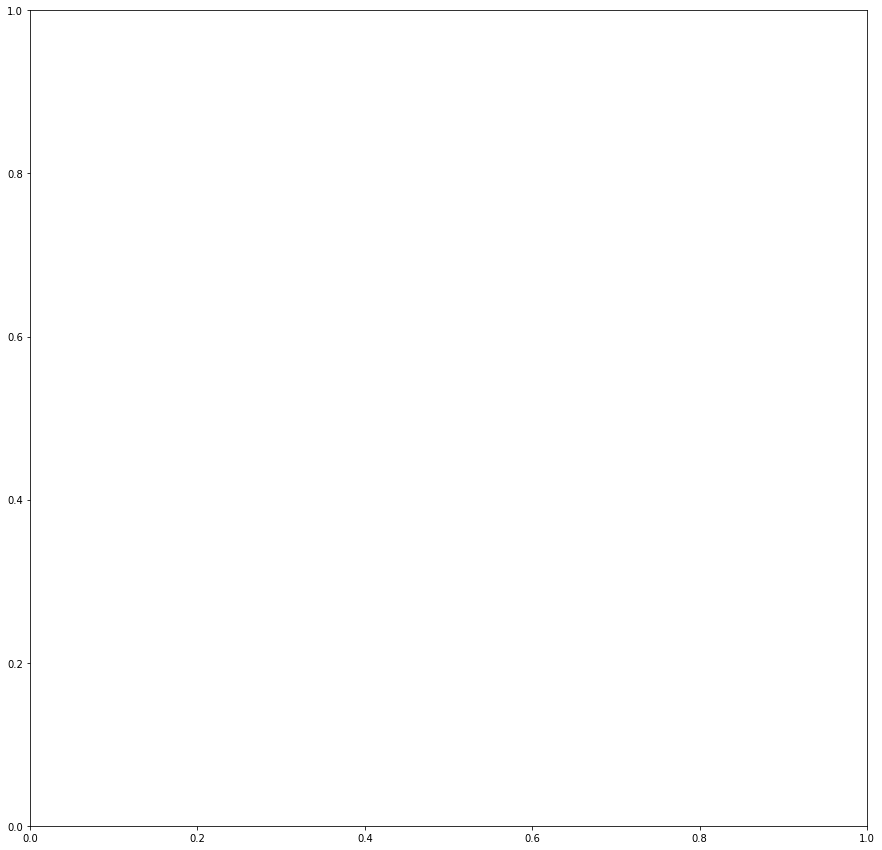

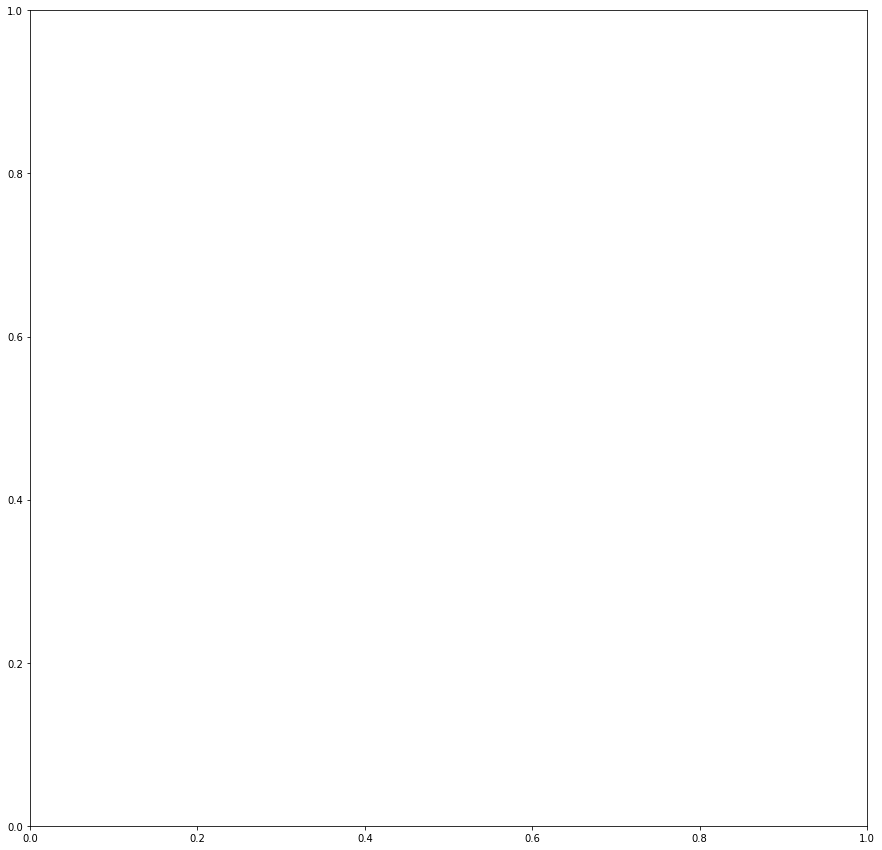

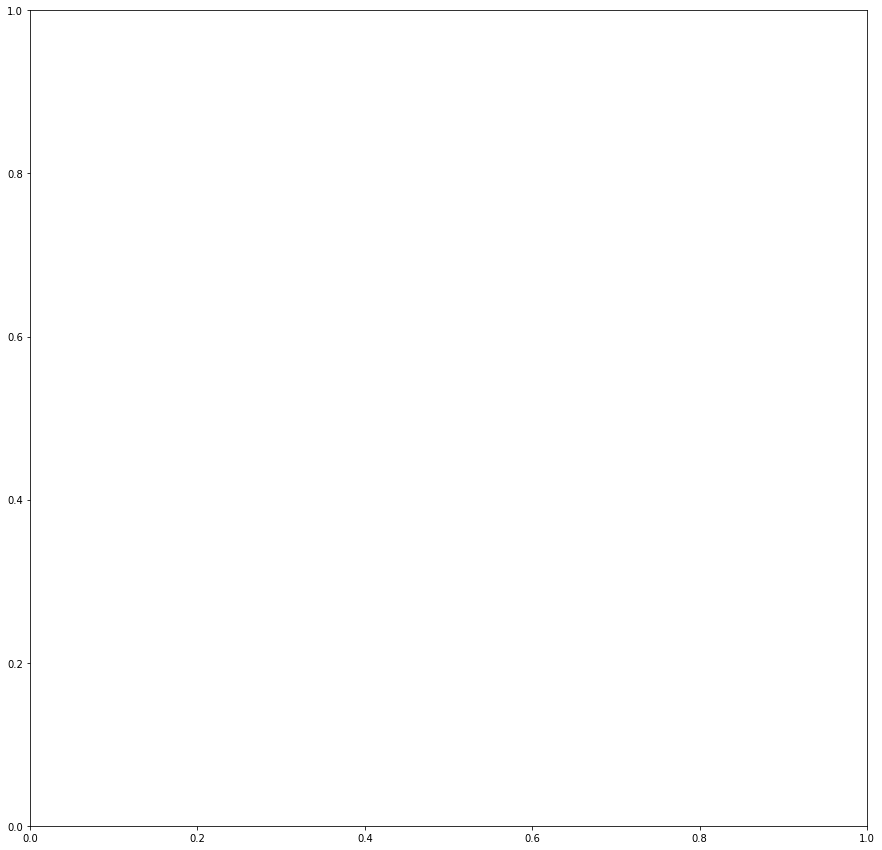

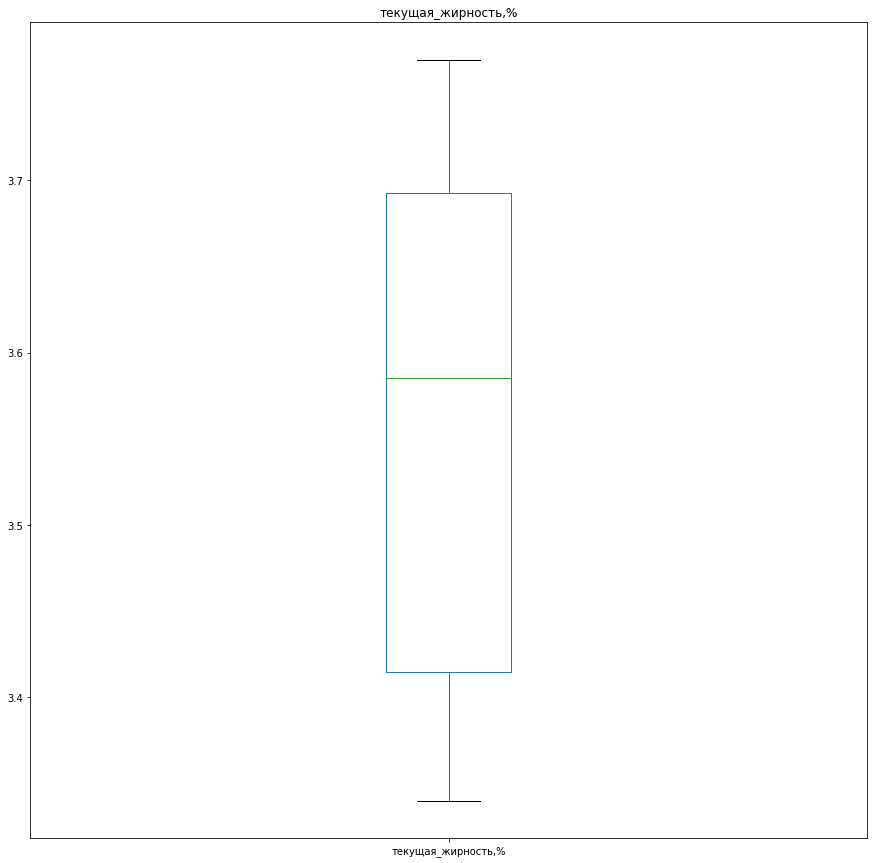

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: текущая_жирность,%, dtype: float64


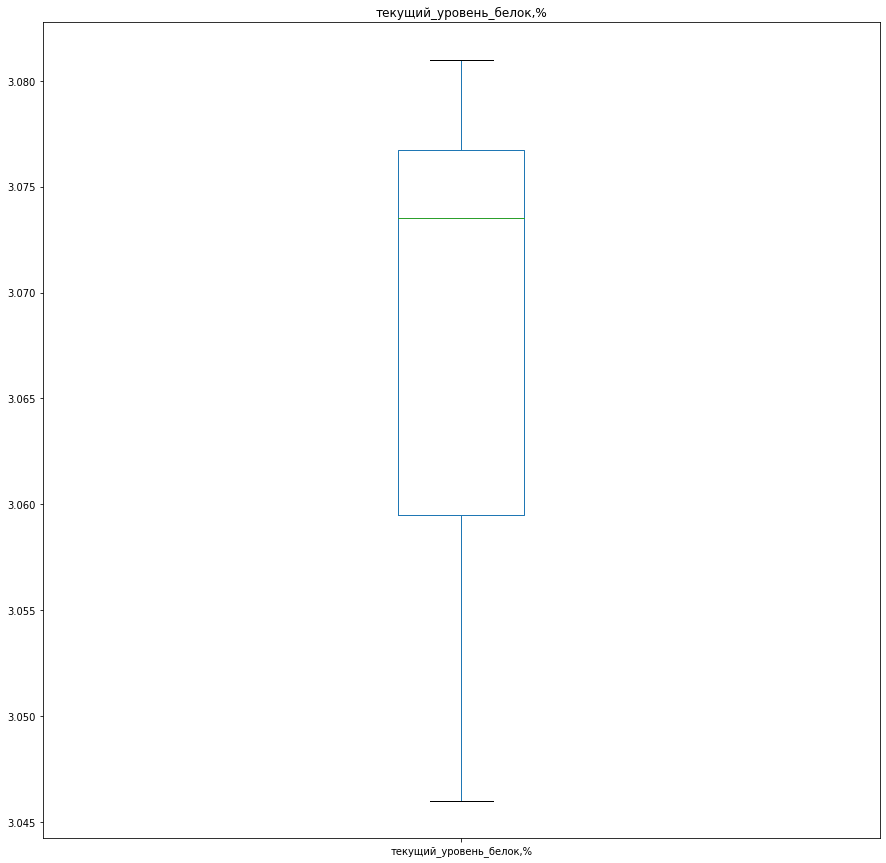

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: текущий_уровень_белок,%, dtype: float64
count              16
unique              2
top       более_2_лет
freq               11
Name: возраст, dtype: object


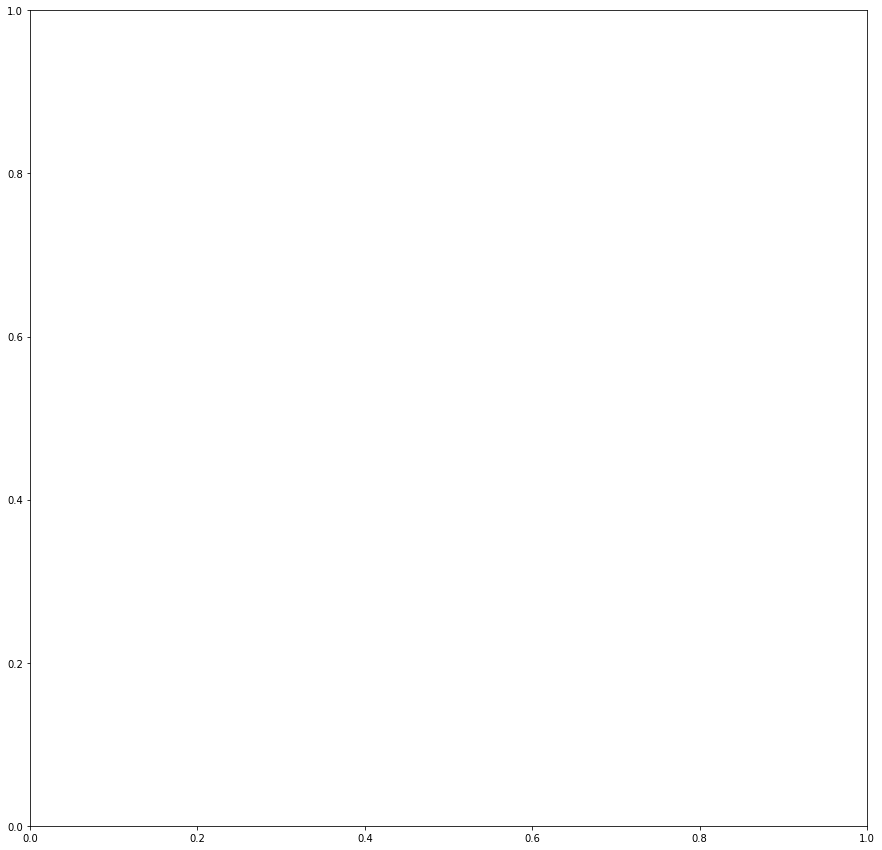

In [40]:
for n in data_cow.columns:
    barplot_function_1(n)

In [41]:
data_main.loc[data_main['удой,_кг'] > 8000]

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис_Бик_Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


C:\Users\simuk\AppData\Local\Temp/ipykernel_8532/1645577846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main[data_main['удой,_кг'] == 45616] = data_main['удой,_кг'].median()
c:\Users\simuk\practicum\practicum_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


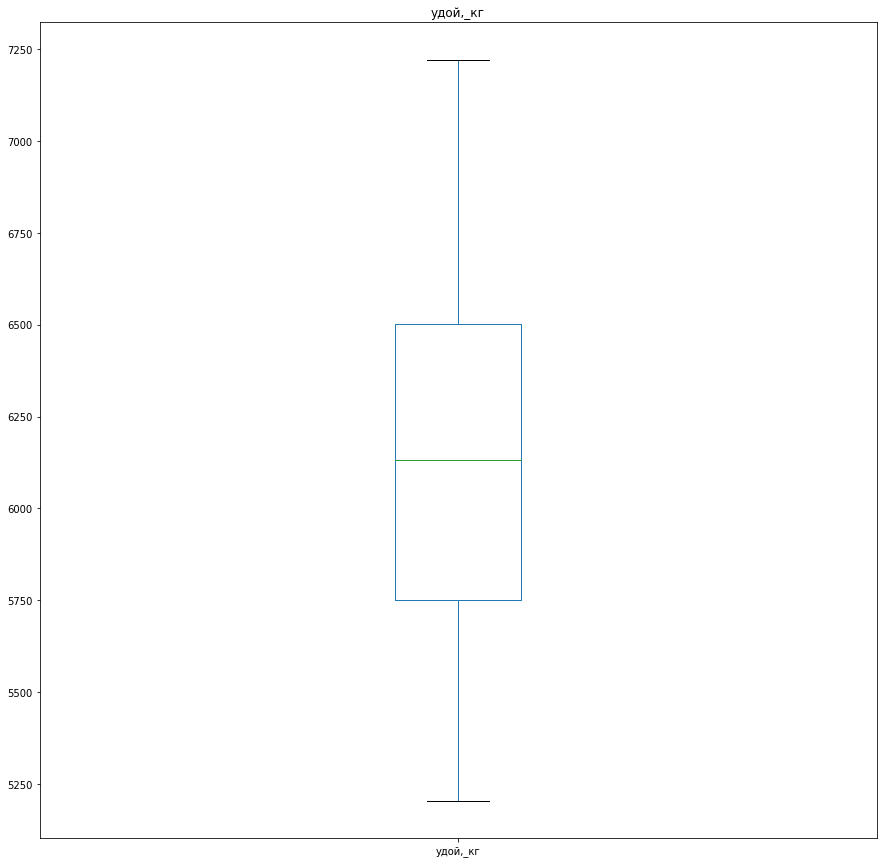

In [42]:
data_main[data_main['удой,_кг'] == 45616] = data_main['удой,_кг'].median()
plt.figure(figsize=(15, 15))
data_main[f'удой,_кг'].plot.box()
plt.title(f'удой,_кг')
plt.show()

In [43]:
data_main['удой,_кг'].describe()

count     629.000000
mean     6125.979332
std       475.478118
min      5204.000000
25%      5751.000000
50%      6133.000000
75%      6501.000000
max      7222.000000
Name: удой,_кг, dtype: float64

Аномальное значение было обнаружено в столбце 'удой,_кг'. Оно было заменено медианное значение. 

**Итоги предобработки данных:**
- Данные имели весьма хорошее качество
- Все названия колонок приведены к нижнему регистру и в них убраны пробелы
- В части столбцов вместо "." стояла ",", что вызывало ошибку, когда те колонки, где тип данных должен быть float, был object. Все столбці привеені к корректнім типам данных. 
- В датафрейме data_main и data_cow были обнаружены явные дубликаты, которые могли быть вызваны технической ошибкой.
- В датафрейме data_main в столбцах "тип_пастбища" и "имя_папы_быка" были обнаружены неявные дубликаты, которые могли возникнуть из-за ошибки ручного заполнения.
- В датафрейме data_main в столбце "удой, кг%" было обнаружено аномальное значение 45616 кг. Это невозможно, поэтому данное знаечние было заменено на медианное. 

# Исследовательский анализ данных 

data_mai

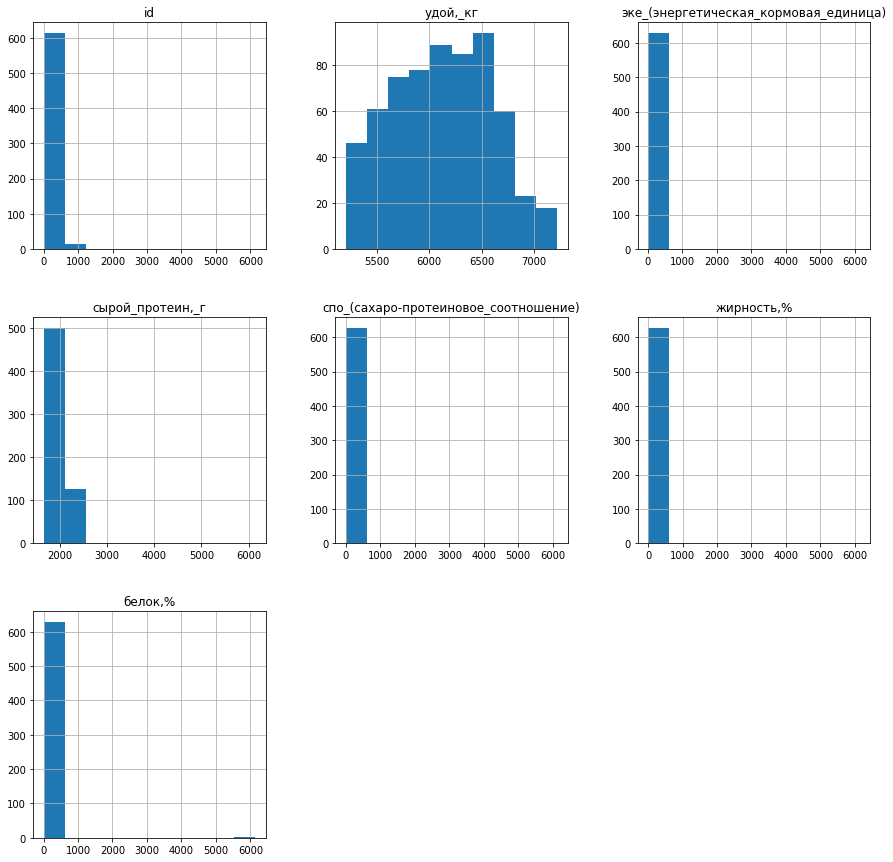

In [45]:
data_main.hist(figsize=(15, 15));

Из данных графиков понятно только то, что коров с удоем более 7000 кг значительно меньше, чем остальных. 

In [46]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1.0,5863.0,14.2,1743.0,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2.0,5529.0,12.8,2138.0,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3.0,5810.0,14.0,1854.0,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4.0,5895.0,12.4,2012.0,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5.0,5302.0,12.8,1675.0,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [50]:
data_main_count = data_main.loc[:, ['удой,_кг','эке_(энергетическая_кормовая_единица)','сырой_протеин,_г','спо_(сахаро-протеиновое_соотношение)', 'жирность,%', 'белок,%']]
data_main_object = data_main.loc[:, ['порода','тип_пастбища','порода_папы_быка','вкус_молока','возраст']]

In [61]:

def pirog(name):
    breed_counts = data_main_object[f'{name}'].value_counts()
    plt.pie(breed_counts, labels=breed_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Круговая диаграмма распределения для показателя {name}')


    plt.show()

In [77]:
def histagramma(name):
    counts = data_main_count[f'{name}']
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.median(counts), color='red', linestyle='dashed', linewidth=2, label='Медиана')
    plt.axvline(np.mean(counts), color='green', linestyle='dashed', linewidth=2, label='Среднее')
    plt.axvline(np.percentile(counts, 25), color='orange', linestyle='dashed', linewidth=2, label='1-й квартиль')
    plt.axvline(np.percentile(counts, 75), color='blue', linestyle='dashed', linewidth=2, label='3-й квартиль')
        
    plt.legend()

    plt.title(f'{name}')
    plt.xlabel(f'Значения')
    plt.ylabel('Частота')
    plt.show()
    

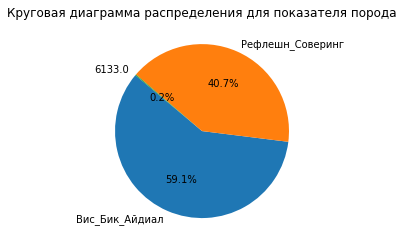

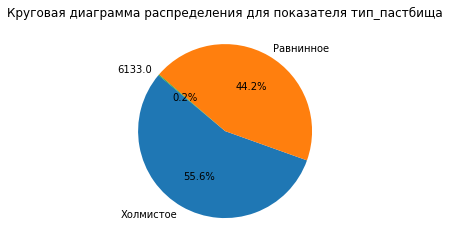

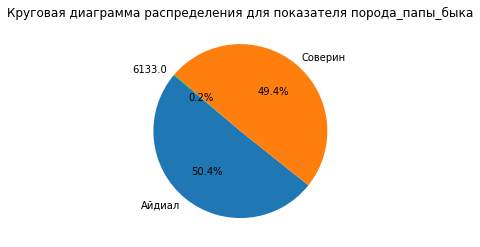

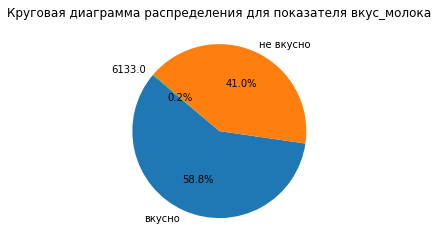

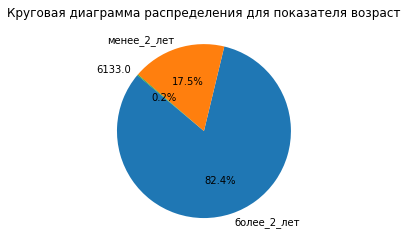

In [62]:
for n in data_main_object.columns:
    pirog(n)

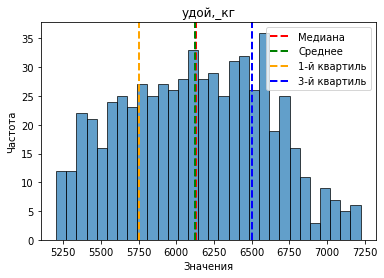

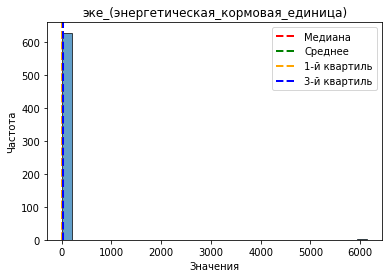

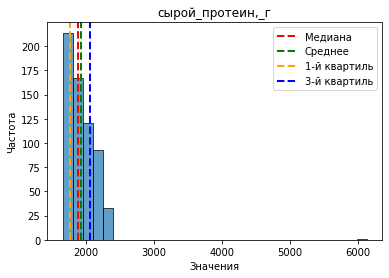

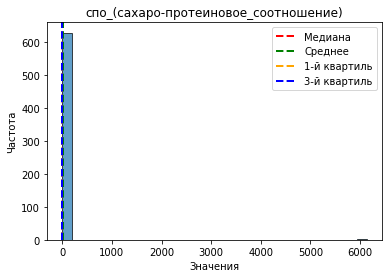

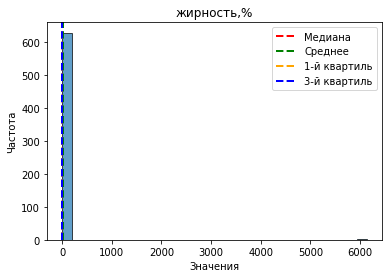

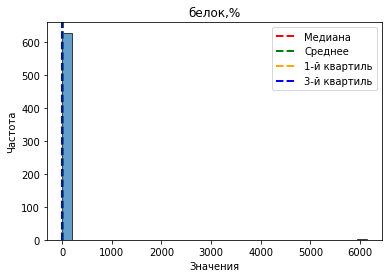

In [78]:
for n in data_main_count:
    histagramma(n)